### 1. Importing Libraries

In [ ]:
import os, tarfile, urllib.request
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
house_path = os.path.join("datasets", "housing")
housing_url = download_root + "datasets/housing/housing.tgz"

project_root_dir = "."
ID = "California Housing"
image_path = os.path.join(project_root_dir, "images", ID)

if not os.path.isdir(image_path):
    os.makedirs(image_path)
    
def save_fig(fig_id, fig_extension = "png", resolution = 300):
    path = os.path.join(image_path, fig_id+ "." + fig_extension)
    print("Saving Figure", fig_id)
    
def fetch_housing(housing_url = housing_url, housing_path = house_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(housing_path)
    housing_tgz.close()
    
fetch_housing()

def load_housing_data(housing_path = house_path):
    filename = os.path.join(path, "housing.csv")
    return pd.read_csv(filename)

housing_data = load_housing_data()

In [ ]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(housing_data['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


C:\Users\aepra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


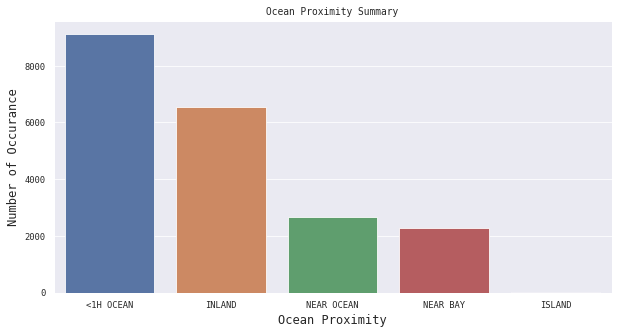

In [ ]:
op_count = housing_data['ocean_proximity'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values)
plt.title("Ocean Proximity Summary")
plt.ylabel("Number of Occurance", fontsize = 12)
plt.xlabel("Ocean Proximity", fontsize = 12)
plt.show()

Saving Figure Geographcal Plot


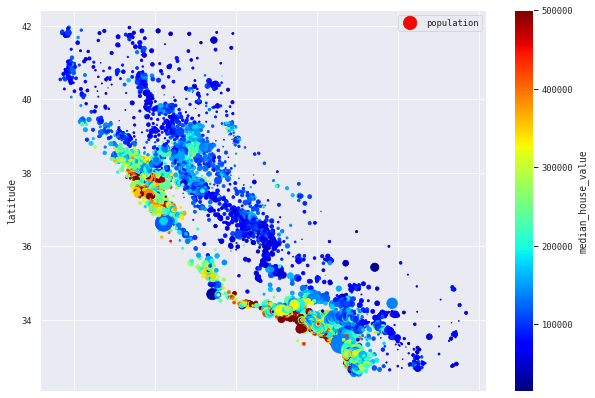

In [ ]:
housing_data.plot(kind='scatter', x = 'longitude', y='latitude', s=housing_data['population']/100, label='population', 
                  figsize = (10,7), c='median_house_value', colorbar=True, cmap=plt.get_cmap("jet"))
plt.legend()
save_fig('Geographcal Plot')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

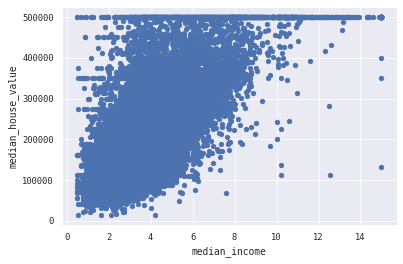

In [ ]:
housing_data.plot(kind = "scatter", x = "median_income", y = "median_house_value")

In [ ]:
#eliminating data quirks
housing_data = housing_data[~housing_data['median_house_value'].isin([500000, 450000, 350000, 280000])].reset_index(drop=True)

<AxesSubplot:>

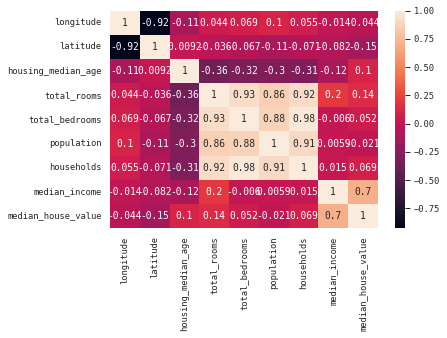

In [ ]:
#heatmap
sns.set(context = "paper", font="monospace")
housing_corr_matrix = housing_data.corr()
sns.heatmap(housing_corr_matrix, annot= True)

In [ ]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_rooms"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["populations_per_household"] = housing_data["population"]/housing_data["households"]

In [ ]:
housing_data = housing_data.drop(["total_rooms","total_bedrooms","households","population"], axis = 1)

In [ ]:
housing_data = housing_data.dropna().reset_index(drop=True)

In [ ]:
labelEncoder = LabelEncoder()
housing_data['ocean_proximity'] = labelEncoder.fit_transform(housing_data['ocean_proximity'])

In [ ]:
y = housing_data['median_house_value']
x = housing_data.drop(['median_house_value'], axis = 1)

In [ ]:
standardscaling = StandardScaler()
standardscaling.fit_transform(x)

array([[-1.3301094 ,  1.0516462 ,  0.98652229, ..., -0.9777388 ,
         2.34426842,  1.29636519],
       [-1.32511662,  1.04228976, -0.60513251, ...,  1.66782729,
         2.33173736,  1.29636519],
       [-1.33510219,  1.03761154,  1.86193244, ..., -0.84441482,
         1.78205577,  1.29636519],
       ...,
       [-0.82583827,  1.77677047, -0.92346347, ..., -0.17518071,
        -1.14399833, -0.114453  ],
       [-0.8757661 ,  1.77677047, -0.84388073, ..., -0.39477315,
        -1.05596504, -0.114453  ],
       [-0.83582383,  1.74870114, -1.00304621, ...,  0.07839628,
        -0.78144015, -0.114453  ]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", x_test.shape)
print("y_test: ", y_test.shape)


x_train:  (16394, 9)
y_train:  (16394,)
x_test:  (4099, 9)
y_test:  (4099,)


In [ ]:
from math import sqrt
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

housing_prediction = lin_reg.predict(x_test)

print(sqrt(mean_squared_error(y_test, housing_prediction)))
print((r2_score(y_test, housing_prediction)))

#RMSE tidak bagus 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').